# Customer Buying Behaviour Analysis - British Airways

### Aim: To build a predictive model to understand factors that influence buying behaviour

In [32]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, roc_auc_score

In [33]:
# Loading the data
df = pd.read_csv('/Users/vatsalmandalia/Downloads/customer_booking.csv', encoding="ISO-8859-1")
display(df)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Exploring the data

In [34]:
# Creating a copy of data
df_copy = df.copy()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [36]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


No missing values in the data.

### Data Preparation

In [37]:
# Mapping 'flight_day' values to int values
df.flight_day.unique()

mapping = {'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7}

df.flight_day = df.flight_day.map(mapping)
df.flight_day.unique()

array([6, 3, 4, 1, 7, 2, 5])

In [38]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [39]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [40]:
# Mapping 'RoundTrip'
mapping_rt = {'RoundTrip':1, 'CircleTrip':2, 'OneWay':3}
df.trip_type = df.trip_type.map(mapping_rt)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [41]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [42]:
# Mapping 'sales_channel' to int values
mapping_sc = {'Internet':1, 'Mobile':2}
df.sales_channel = df.sales_channel.map(mapping_sc)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis

In [43]:
df_copy.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


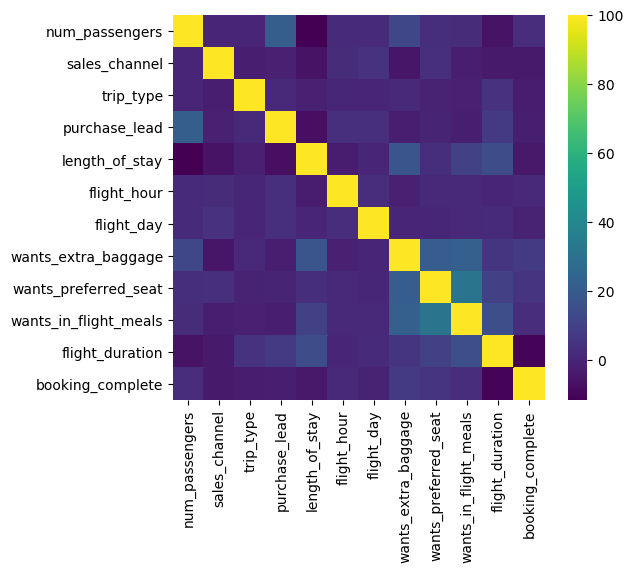

In [44]:
# correlation matrix
cor_mat = df.corr()*100.0
plt.figure(figsize = (6,5))
sns.heatmap(cor_mat, cmap = 'viridis')
plt.show()

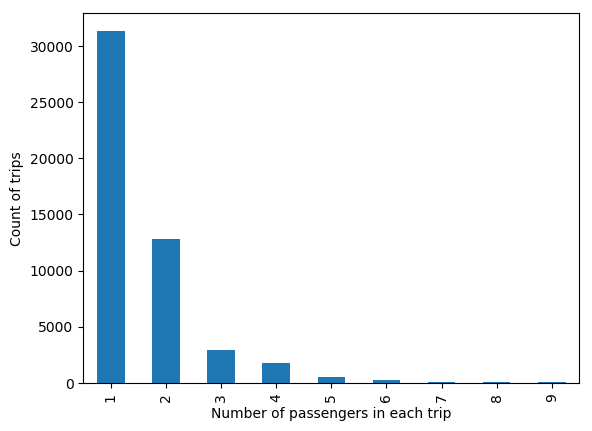

In [45]:
# Number of passengers
df_copy.num_passengers.value_counts().plot(kind='bar')
plt.xlabel('Number of passengers in each trip')
plt.ylabel('Count of trips')
plt.show()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

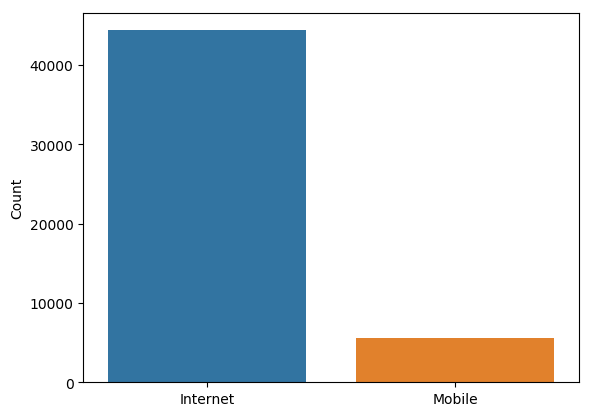

In [46]:
# Sales channel count
sales_chn = df_copy['sales_channel'].value_counts()
display(sales_chn)
sns.barplot(x = sales_chn.index, y = sales_chn.values)
plt.ylabel('Count')
plt.show()

- More than 95% of bookings are initiated through Internet mode with only little less than 6000 done in Mobile.

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

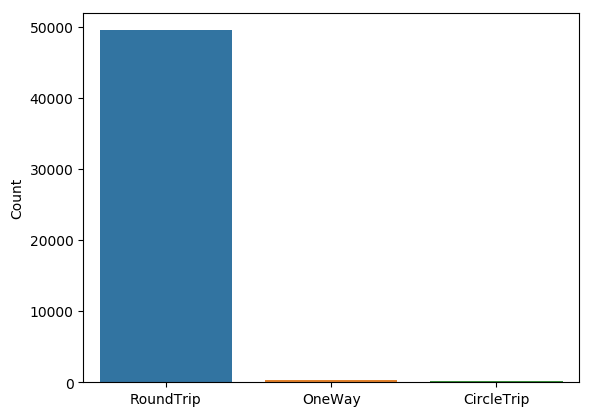

In [47]:
# Trip type among all trips
triptype = df_copy['trip_type'].value_counts()
display(triptype)
sns.barplot(x = triptype.index, y = triptype.values)
plt.ylabel('Count')
plt.show()

- 99% of bookings are Round Trip categories.

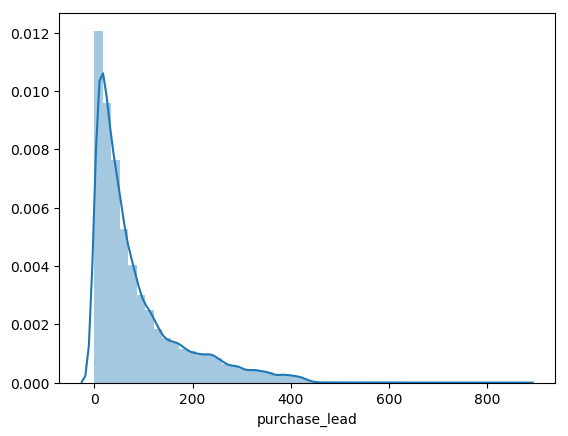

In [48]:
# Purchase lead - number of days between travel date and booking date
sns.distplot(df_copy['purchase_lead'])
plt.show()

- Highly positively skewed with majority of bookings having number of days between travel and booking date between 0-200.

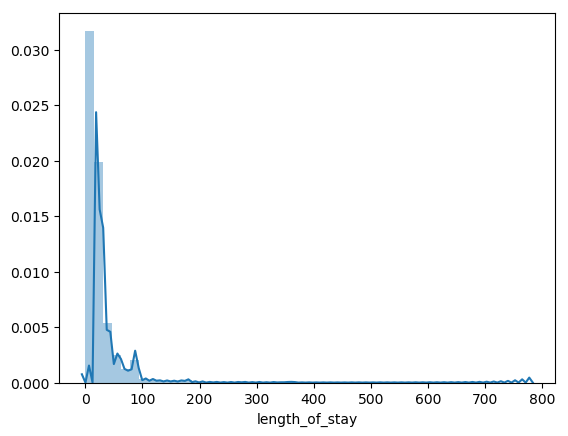

In [49]:
# Length of stay at the destination
sns.distplot(df_copy.length_of_stay)
plt.show()

- Extremely positively skewed with majority of trips having length of stay in destination between 0-100 days.

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

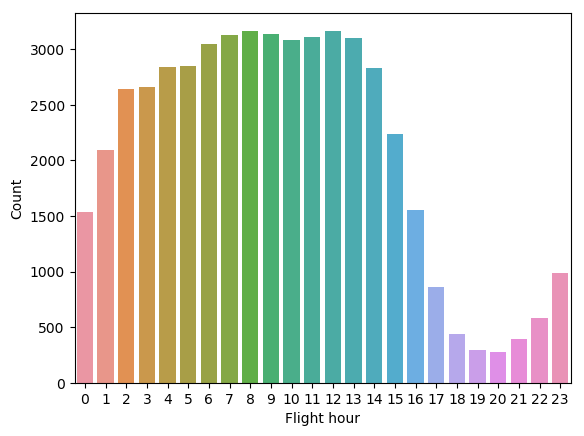

In [50]:
# Hour of the flight
flthour = df_copy.flight_hour.value_counts()
display(flthour)
sns.barplot(x = flthour.index, y = flthour.values)
plt.ylabel('Count')
plt.xlabel('Flight hour')
plt.show()

- From 2am to 2pm, there are more than 2500 trips at each flight hour.
- Between 6pm to 9pm the travel bookings are at a minimum.

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

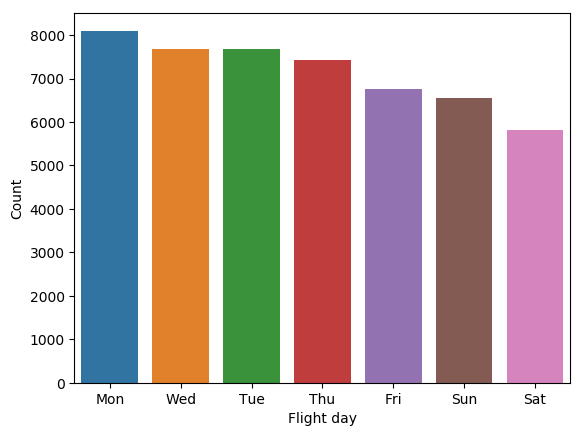

In [51]:
# Day of the flight
fltday = df_copy.flight_day.value_counts()
display(fltday)
sns.barplot(x = fltday.index, y = fltday.values)
plt.ylabel('Count')
plt.xlabel('Flight day')
plt.show()

- Observe a slight decline in number of trips from Monday to Saturday.

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

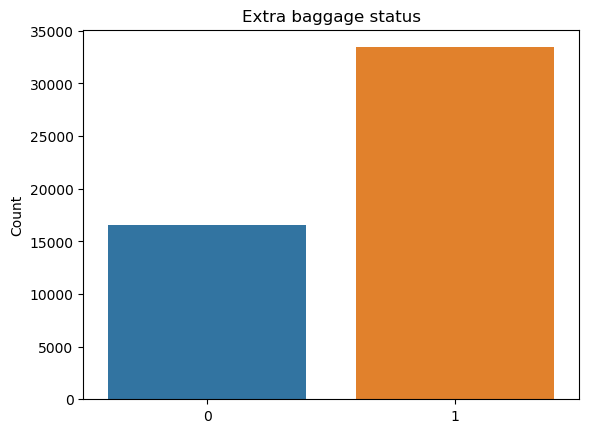

In [52]:
# Extra baggage status
extbag = df_copy.wants_extra_baggage.value_counts()
display(extbag)
sns.barplot(x = extbag.index, y = extbag.values)
plt.ylabel('Count')
plt.title('Extra baggage status')
plt.show()

- Over 30000 trips have asked for extra baggage.

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

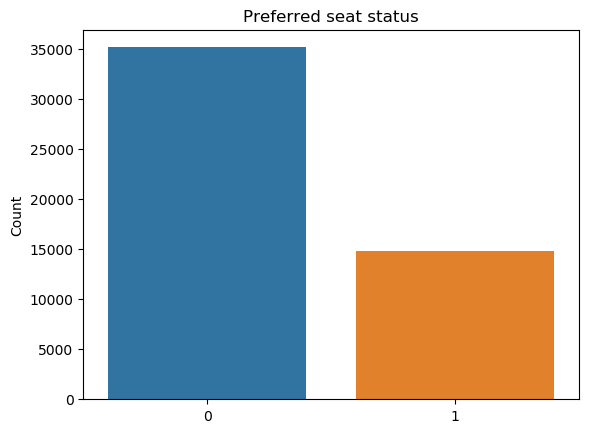

In [53]:
# Extra preferred seat status
prefseat = df_copy.wants_preferred_seat.value_counts()
display(prefseat)
sns.barplot(x = prefseat.index, y = prefseat.values)
plt.ylabel('Count')
plt.title('Preferred seat status')
plt.show()

- Around 70% of trips do not have a preferred seat request.

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

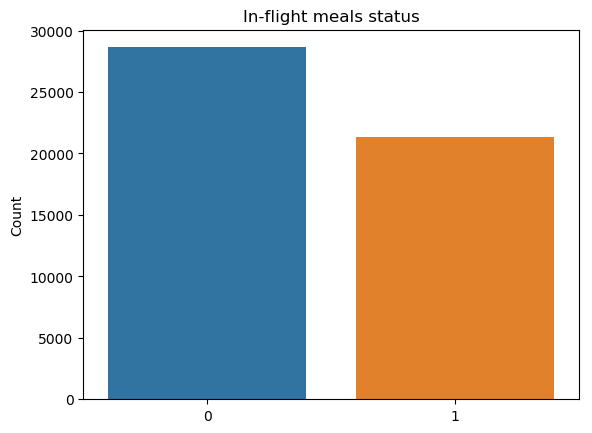

In [54]:
# In flight meals status
infltmeals = df_copy.wants_in_flight_meals.value_counts()
display(infltmeals)
sns.barplot(x = infltmeals.index, y = infltmeals.values)
plt.ylabel('Count')
plt.title('In-flight meals status')
plt.show()

- Little less than 30000 trips have not requested for in-flight meals.

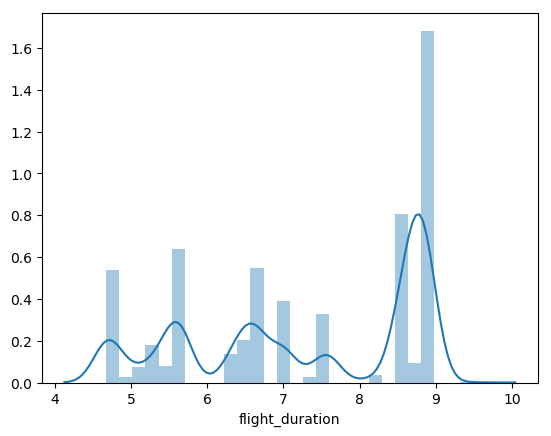

In [55]:
# Flight duration
sns.distplot(df_copy.flight_duration)
plt.show()

- Not a normal distribution.
- Majority of trips are long-duration trips between 8-9 hrs.

0    42522
1     7478
Name: booking_complete, dtype: int64

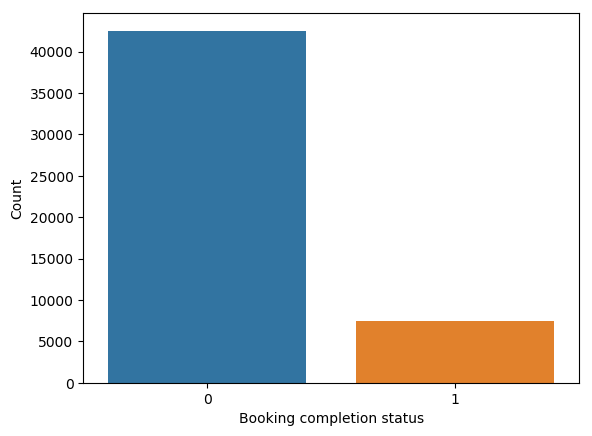

In [56]:
# Booking completion status
bkgcomplete = df_copy.booking_complete.value_counts()
display(bkgcomplete)
sns.barplot(x = bkgcomplete.index, y = bkgcomplete.values)
plt.ylabel('Count')
plt.xlabel('Booking completion status')
plt.show()

- 90% of bookings are not completed with only 7500 trips approximately confirmed.

In [57]:
df_copy.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Scaling the data

In [58]:
# Dropping unecessary columns 'route' and 'booking_origin'
df.drop(columns = ['route', 'booking_origin'], inplace = True)

In [59]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,0,0,5.52,0
2,2,1,1,243,22,17,3,1,1,0,5.52,0
3,1,1,1,96,31,4,6,0,0,1,5.52,0
4,2,1,1,68,22,15,3,1,0,1,5.52,0


In [60]:
# Dividing data in target and independent dataframes
target = pd.Series(df.booking_complete)
X = df.drop('booking_complete', axis = 1)
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,1,1,262,19,7,6,1,0,0,5.52
1,1,1,1,112,20,3,6,0,0,0,5.52
2,2,1,1,243,22,17,3,1,1,0,5.52
3,1,1,1,96,31,4,6,0,0,1,5.52
4,2,1,1,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62
49996,1,1,1,111,6,4,7,0,0,0,5.62
49997,1,1,1,24,6,22,6,0,0,1,5.62
49998,1,1,1,15,6,11,1,1,0,1,5.62


In [61]:
# Standardizing the feature columns
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.400684,-0.355785,-0.098041,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.579559,-0.355785,-0.098041,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,0.400684,-0.355785,-0.098041,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.579559,-0.355785,-0.098041,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,0.400684,-0.355785,-0.098041,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.355785,-0.098041,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368
49996,-0.579559,-0.355785,-0.098041,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.579559,-0.355785,-0.098041,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.579559,-0.355785,-0.098041,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368


## Feature Selection - SelectKBest

This technique gives the importance of each feature. It gives the correlation of the feature with the target variable.

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [63]:
bestfeatures = SelectKBest(score_func = chi2, k = 5)    # select top 5 best features
bestfeatures.fit(X,target)

SelectKBest(k=5, score_func=<function chi2 at 0x7fc945d44510>)

In [64]:
X.columns[bestfeatures.get_support()]      # 5 best column names using boolean indexing

Index(['purchase_lead', 'length_of_stay', 'wants_extra_baggage',
       'wants_preferred_seat', 'flight_duration'],
      dtype='object')

In [65]:
dfscores = pd.DataFrame(bestfeatures.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns, dfscores], axis = 1)
scores.columns = ['specs','score']
scores.sort_values('score', ascending = False).reset_index(drop = True)

,specs,score
0,length_of_stay,4480.964772
1,purchase_lead,2358.678338
2,flight_duration,173.831731
3,wants_preferred_seat,88.288090
4,wants_extra_baggage,76.890347
5,wants_in_flight_meals,20.130962
6,num_passengers,19.018876
7,flight_hour,8.207322
8,sales_channel,7.557996
9,flight_day,2.540157


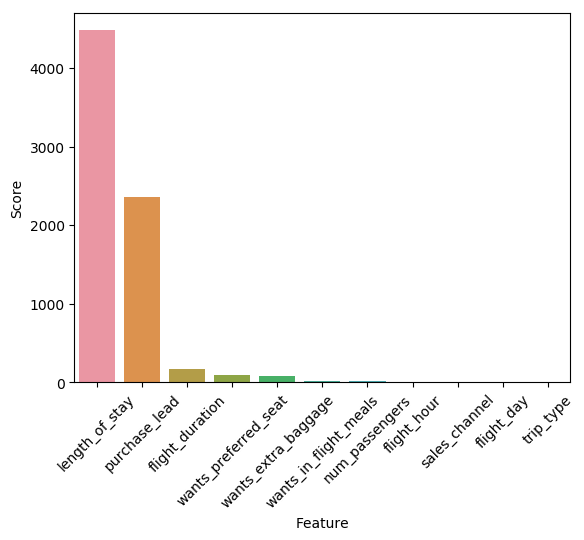

In [66]:
sns.barplot(x = 'specs', y = 'score', data = scores.sort_values('score', ascending = False))
plt.xlabel('Feature')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

- 'length_of_stay' and 'purchase_lead' are in the top two. They show a strong correlation with the 'booking_complete' variable.
- Length of stay at the destination and the time between the purchase date and travel date of the trip have a greater influence on the completion status of the booking.

## Model Training

In [67]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size = 0.3)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (35000, 11)
X_test shape: (15000, 11)
y_train shape: (35000,)
y_test shape: (15000,)


## Logistic Regression model building

In [68]:
# Model fitting
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
# Predicting on the test data
y_pred = logreg.predict(X_test)
set(y_pred)

{0}

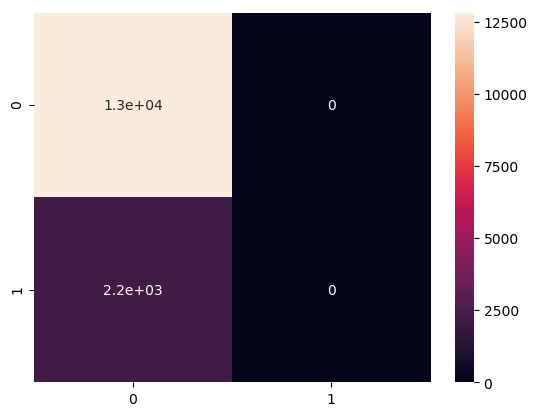

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12810
           1       0.00      0.00      0.00      2190

   micro avg       0.85      0.85      0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.79     15000

Accuracy score =  0.854


In [70]:
# Confusion matrix
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot = True)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy score = ", accuracy_score(y_test, y_pred))

- For class 1 labels, all instances have been falsely predicted.

#### ROC Curve

In [71]:
from sklearn.metrics import roc_curve

In [72]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

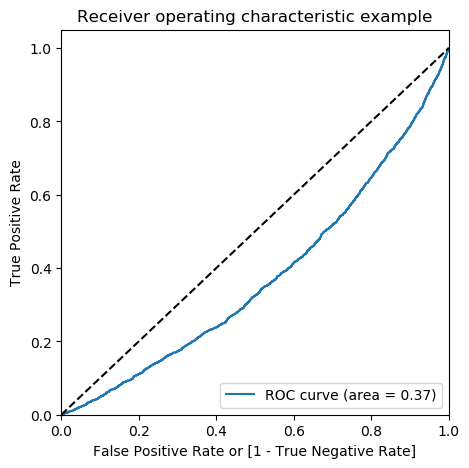

In [73]:
# Predicted probabilities of class '0'
y_pred_proba_0 = logreg.predict_proba(X_test)[:,0]

draw_roc(y_test, y_pred_proba_0)

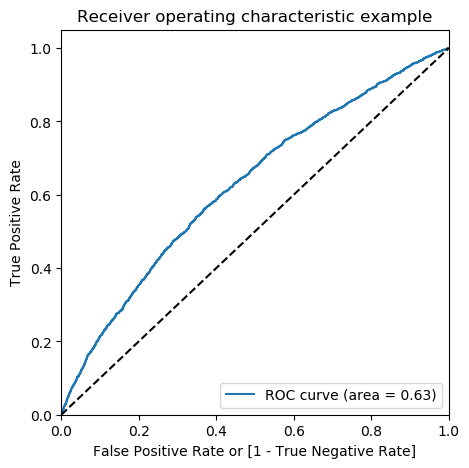

In [74]:
# Predicted probabilities of class '1'
y_pred_proba_1 = logreg.predict_proba(X_test)[:,1]

draw_roc(y_test, y_pred_proba_1)

- Logistic regression model gives a AUC = 0.63 for class '1'.

We can also look at other classification algorithms like KNN, SVM, Decision Trees and Random Forests.

## K-Nearest Neighbors Classification

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Model fitting
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Predicting on the test data
y_pred_knn = knn.predict(X_test)

In [77]:
set(y_pred_knn)

{0, 1}

Accuracy score =  0.8327333333333333


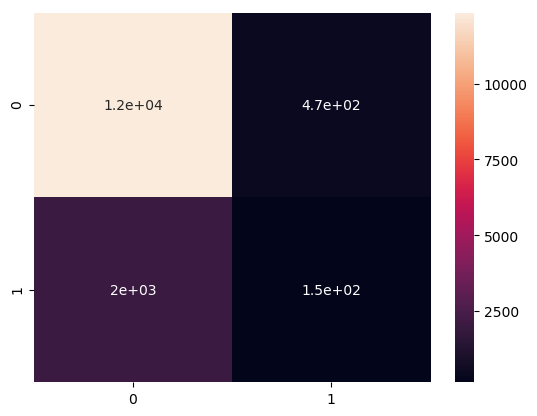

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12810
           1       0.24      0.07      0.11      2190

   micro avg       0.83      0.83      0.83     15000
   macro avg       0.55      0.52      0.51     15000
weighted avg       0.77      0.83      0.79     15000



In [78]:
# Metrics
# accuracy score
print("Accuracy score = ", accuracy_score(y_test, y_pred_knn))

# confusion matrix
cmat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cmat_knn, annot = True)
plt.show()

# classification report
print(classification_report(y_test, y_pred_knn))

In [79]:
# Finding optimal value of 'k'- number of nearest neighbors
train_error = []
test_error = []

for i in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train,y_train)
    y_pred_train = knn_model.predict(X_train)
    y_pred_test = knn_model.predict(X_test)

    train_error.append(np.mean(y_train != y_pred_train))
    test_error.append(np.mean(y_test != y_pred_test))

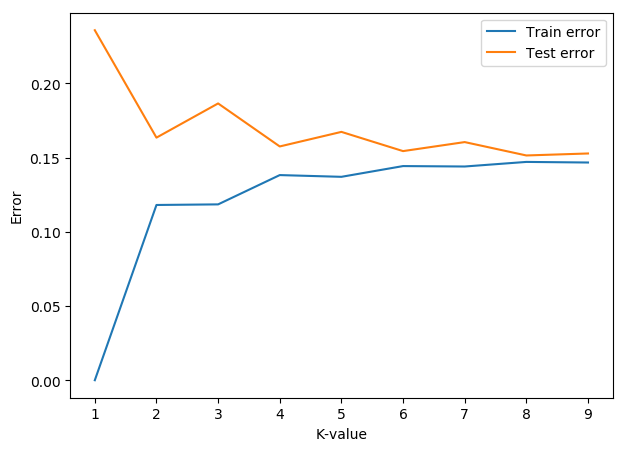

In [80]:
# Plotting the train and test errors for each 'k'
plt.figure(figsize = (7,5))
sns.lineplot(x = range(1,10), y = train_error, label = 'Train error')
sns.lineplot(x = range(1,10), y = test_error, label = 'Test error')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Error')
plt.show()

For k-values >= 2, the test errors decrease. For our analysis, optimal k-value is 8. 

In [81]:
knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Metrics
print("Accuracy score = ", accuracy_score(y_test, y_pred_knn))

print(confusion_matrix(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

Accuracy score =  0.8486
[[12690   120]
 [ 2151    39]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12810
           1       0.25      0.02      0.03      2190

   micro avg       0.85      0.85      0.85     15000
   macro avg       0.55      0.50      0.48     15000
weighted avg       0.77      0.85      0.79     15000



## Decision Trees

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier()

# Model fitting
dtree.fit(X_train, y_train)

# Predicting on the test data
y_pred_dtree = dtree.predict(X_test)

In [84]:
# Metrics
print("Accuracy score = ", accuracy_score(y_test, y_pred_dtree))

print(confusion_matrix(y_test, y_pred_dtree))

print(classification_report(y_test, y_pred_dtree))

Accuracy score =  0.7524666666666666
[[10739  2071]
 [ 1642   548]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     12810
           1       0.21      0.25      0.23      2190

   micro avg       0.75      0.75      0.75     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.77      0.75      0.76     15000



## Random Forests

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)

y_pred_rfclf = rfclf.predict(X_test)

In [87]:
# Metrics
print("Accuracy score = ", accuracy_score(y_test, y_pred_rfclf))

print(confusion_matrix(y_test, y_pred_rfclf))

print(classification_report(y_test, y_pred_rfclf))

Accuracy score =  0.8448666666666667
[[12513   297]
 [ 2030   160]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     12810
           1       0.35      0.07      0.12      2190

   micro avg       0.84      0.84      0.84     15000
   macro avg       0.61      0.52      0.52     15000
weighted avg       0.79      0.84      0.80     15000



We can summaries all the models and their accuracy scores.

In [88]:
models_acc = pd.DataFrame({'Models':['LogisticRegression','K-NearestNeighbors','DecisionTree','RandomForests'],
                          'Accuracy':[np.round(100.0*accuracy_score(y_test,y_pred),2),
                                      np.round(100.0*accuracy_score(y_test,y_pred_knn),2),
                                      np.round(100.0*accuracy_score(y_test,y_pred_dtree),2),
                                      np.round(100.0*accuracy_score(y_test,y_pred_rfclf),2)]})
models_acc

,Models,Accuracy
0,LogisticRegression,85.40
1,K-NearestNeighbors,84.86
2,DecisionTree,75.25
3,RandomForests,84.49


Logistic Regression leads in terms of accuracy score, followed closely by K-Nearest Neighbors and Random Forests. To improve the accuracy further, cross validation technique is implemented.

## Applying K-fold Cross Validation

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [91]:
# Logistic Regression
logreg_cvscore = cross_val_score(estimator = logreg, X = X_scaled, y = target, cv = 5, n_jobs = -1)
print("Scores:", logreg_cvscore)
print("Average accuracy = ", np.mean(logreg_cvscore))

Scores: [0.85041496 0.85041496 0.8504     0.85048505 0.85048505]
Average accuracy =  0.8504400028036001


In [92]:
# K-Nearest Neighbors
knn_cvscore = cross_val_score(estimator = knn, X = X_scaled, y = target, cv = 5, n_jobs = -1)
print("Scores:", knn_cvscore)
print("Average accuracy = ", np.mean(knn_cvscore))

Scores: [0.84951505 0.84531547 0.8469     0.83878388 0.83828383]
Average accuracy =  0.8437596447437963


In [93]:
# Decision Tree
dtree_cvscore = cross_val_score(estimator = dtree, X = X_scaled, y = target, cv = 5, n_jobs = -1)
print("Scores:", dtree_cvscore)
print("Average accuracy = ", np.mean(dtree_cvscore))

Scores: [0.79242076 0.71342866 0.5624     0.38183818 0.30593059]
Average accuracy =  0.5512036383872363


In [94]:
# Random Forest
rfclf_cvscore = cross_val_score(estimator = rfclf, X = X_scaled, y = target, cv = 5, n_jobs = -1)
print("Scores:", rfclf_cvscore)
print("Average accuracy = ", np.mean(rfclf_cvscore))

Scores: [0.84741526 0.82641736 0.7693     0.38553855 0.40964096]
Average accuracy =  0.6476624269380242


In [96]:
cross_val_models_acc = pd.DataFrame({'Models':['LogisticRegression','K-NearestNeighbors','DecisionTree','RandomForests'],
                          'CV_Accuracy':[np.round(100.0*np.mean(logreg_cvscore),2),
                                      np.round(100.0*np.mean(knn_cvscore),2),
                                      np.round(100.0*np.mean(dtree_cvscore),2),
                                      np.round(100.0*np.mean(rfclf_cvscore),2)]})
cross_val_models_acc

,Models,CV_Accuracy
0,LogisticRegression,85.04
1,K-NearestNeighbors,84.38
2,DecisionTree,55.12
3,RandomForests,64.77


From this technique, logistic regression performs better from cross validation. Random Forest and Decision Tree shows poor accuracy. One of the reasons could be class imbalance in the target variable for each fold.

In [96]:
target.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64